
# Проект: Статистический анализ данных
Описание проекта

Пользователи сервиса GoFast пользуются мобильным приложением:

без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

Цель проекта

Проанализировать данные (пользователи из нескольких городов, а также об их поездках) и проверить некоторые гипотезы, которые помогут сервису аренды самокатов GoFast вырасти.

Описание данных

Есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

user_id - уникальный идентификатор пользователя
name - имя пользователя
age - возраст
city - город
subscription_type - тип подписки (free, ultra)

Поездки — rides_go.csv

user_id - уникальный идентификатор пользователя
distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date - дата совершения поездки
Подписки — subscriptions_go.csv

subscription_type - тип подписки
minute_price - стоимость одной минуты поездки по данной подписке
start_ride_price - стоимость начала поездки
subscription_fee - стоимость ежемесячного платежа



# Импортируем библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных

1.1.Считаем CSV-файлы(пользователи,поездки,подписки) с данными зададим переменные и  отобразим первые строки

In [46]:
users_go = pd.read_csv("/datasets/users_go.csv")
display(" Таблица пользователей ",users_go.head())
rides_go = pd.read_csv("/datasets/rides_go.csv")
display(" Таблица поездок " , rides_go.head())
subscriptions_go = pd.read_csv("/datasets/subscriptions_go.csv")
display(" Таблица подписок ", subscriptions_go)

' Таблица пользователей '

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


' Таблица поездок '

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


' Таблица подписок '

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


1.2. Изучим общую информацию о каждом датафрейме.

In [44]:
print(users_go.info())
print('Количество явных дубликатов в `users_go.csv` = ', users_go.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None
Количество явных дубликатов в `users_go.csv` =  31


In [45]:
print(rides_go.info())
print('Количество явных дубликатов в `rides_go.csv` = ', rides_go.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None
Количество явных дубликатов в `rides_go.csv` =  0


In [6]:
print(subscriptions_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


Построим гистограммы значимых фреймов данных

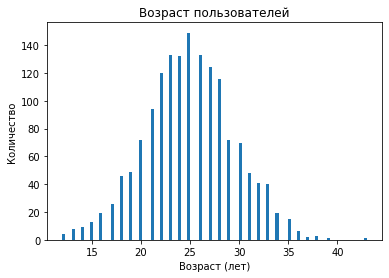

In [9]:
plt.hist(users_go['age'], bins=100)
plt.title('Возраст пользователей')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество')
plt.show()

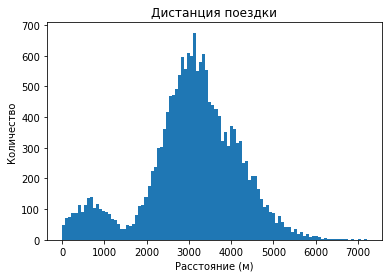

In [12]:
plt.hist(rides_go['distance'], bins=100)
plt.title('Дистанция поездки')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество')
plt.show()

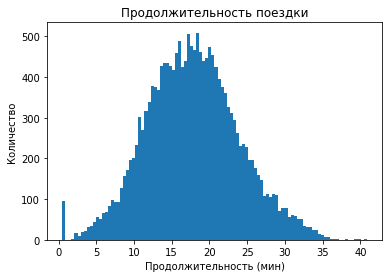

In [13]:
plt.hist(rides_go['duration'], bins=100)
plt.title('Продолжительность поездки')
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Количество')
plt.show()

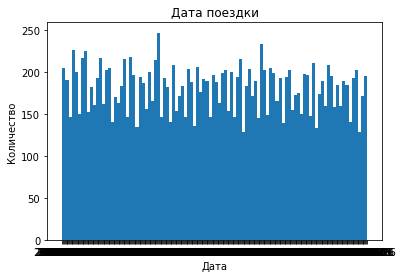

In [16]:
plt.hist(rides_go['date'], bins=100)
plt.title('Дата поездки')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

Вывод: -в предоставленных данных файла о пользователях users_go имеются
       1565 записей; пропусков нет, количество явных дубликатов: 31;
       - в предоставленных данных файла о поездках rides_go  имеются
       18068 записей, пропусков нет, явных дубликатов нет;
       -в предоставленных жанных файла о подписке subscriptions_go имеются
        2 записи, пропусков нет, явных дубликатов нет. 
        Названия столбцов в норме. 
      Данные признаны полными и достаточными для исследования.


# Шаг 2. Предобработка данных

2.1. Удалим дубликаты в users_go

In [354]:
users_go = users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == False]

Проверка наличия дубликатов в 'users_go'

In [355]:
users_go.sort_values(by='user_id').loc[users_go['user_id'].duplicated() == True].count()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Корректировка столбцов в 'users_go'

In [356]:
users_go['user_id'] = users_go['user_id'].astype('uint16')
users_go['age'] = users_go['age'].astype('uint8')
users_go.loc[users_go['subscription_type'] == 'ultra', 'subscription_type'] = True # 'ultra'
users_go.loc[users_go['subscription_type'] == 'free', 'subscription_type'] = False # 'free'
users_go['subscription_type'] = users_go['subscription_type'].astype('bool')

Корректировка столбцов в  'rides_go'

In [357]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

In [358]:
rides_go['distance'] = rides_go['distance'].round(2)#округлим до 2-х знаков

In [359]:
rides_go['duration'] = np.ceil(rides_go['duration']).astype('int')# Округлил до целых и перевел в int


Добавление столбца 'month' с номером месяца в датафейм 'rides_go'

In [360]:
rides_go['month'] = pd.DatetimeIndex(rides_go['date']).month

Минимальная дата : 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


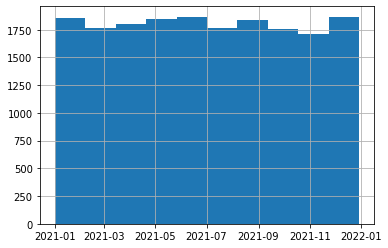

In [361]:
print('Минимальная дата :', rides_go['date'].min())
print('Максимальная дата:', rides_go['date'].max())
rides_go['date'].hist()
plt.show()

Корректировка столбцов  в  'subscriptions_go'

In [362]:
#Корректировка столбца 'subscription_type'
subscriptions_go.loc[subscriptions_go['subscription_type'] == 'ultra', 'subscription_type'] = True # 'ultra'
subscriptions_go.loc[subscriptions_go['subscription_type'] == 'free', 'subscription_type'] = False # 'free'
subscriptions_go['subscription_type'] = subscriptions_go['subscription_type'].astype('bool')
for i in ['minute_price', 'start_ride_price', 'subscription_fee']:
    subscriptions_go[i] = subscriptions_go[i].astype('uint8')

Проверка после предобработки данных

In [363]:
users_go.info()
users_go.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   uint16
 1   name               1534 non-null   object
 2   age                1534 non-null   uint8 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   bool  
dtypes: bool(1), object(2), uint16(1), uint8(1)
memory usage: 41.9+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,True
1,2,Станислав,31,Омск,True
2,3,Алексей,20,Москва,True
3,4,Константин,26,Ростов-на-Дону,True
4,5,Адель,28,Омск,True


In [364]:
rides_go.info()
rides_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  int64         
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 705.9 KB


,user_id,distance,duration,date,month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8


In [365]:
subscriptions_go.info()
subscriptions_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   subscription_type  2 non-null      bool 
 1   minute_price       2 non-null      uint8
 2   start_ride_price   2 non-null      uint8
 3   subscription_fee   2 non-null      uint8
dtypes: bool(1), uint8(3)
memory usage: 136.0 bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,False,8,50,0
1,True,6,0,199


Вывод: в результате предобработки данных было выполнены следующие действия:
       -в данных users_go удалил дубликаты;
       -в данных users_go округлил distance в метрах до 2 знаков после запятой,
                          округлил duration до целых и перевел в int, 
                          привел столбец date к типу datetime64, 
                          создали столбец month с номером месяца;
       -корректировка столбца 'subscription_type'.

 Шаг 3. Исследовательский анализ данных

3.1 Частота встречаемости городов в выборке

гистограмма и таблица Количество пользователей по городам:

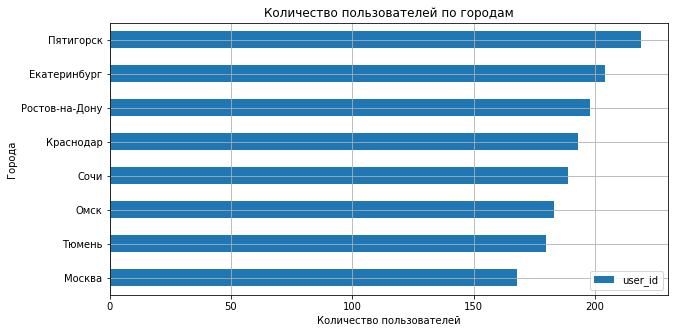

Количество пользователей по городам 


,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [382]:
(
    users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='barh', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по городам')
plt.ylabel('Города')
plt.xlabel('Количество пользователей')

plt.show()
print('Количество пользователей по городам ') 
users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)


Вывод: лидерство по частотности держит город Пятигорск, за ним Екатеринбург и Ростов-на-Дону, 
       замыкает список   Москва.
       Замечено, что в лидерах в основном южные города, где сезон проката больше,
       (исключение составляет г.Екатеринбург: 2ой в списке).Возможно, это связано также с тем,что в городах-лидерах        короткие расстояния и удобнее использовать самокат для передвижения,нежели чем в столице.



3.2 Соотношение пользователей с подпиской и без подписки

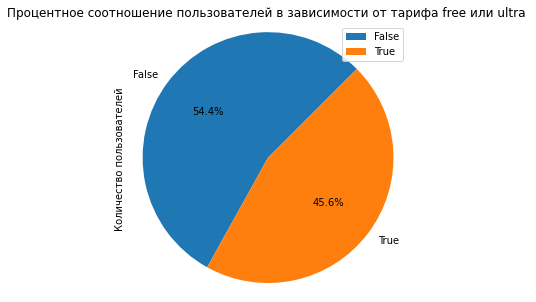

In [383]:
(
    users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(5,5),  label='Количество пользователей', 
    autopct='%1.1f%%', startangle=45,
    title='Процентное соотношение пользователей в зависимости от тарифа free или ultra ')

)
plt.axis('equal')
plt.show()

Вывод: количество пользователей без подписки free (54,4%) превышает количество пользователей с подпиской ultra (45,6%).



3.3 Возраст пользователей

#cтроим гистограмму Количество пользователей по возрасту и определим средний возраст пользователя:

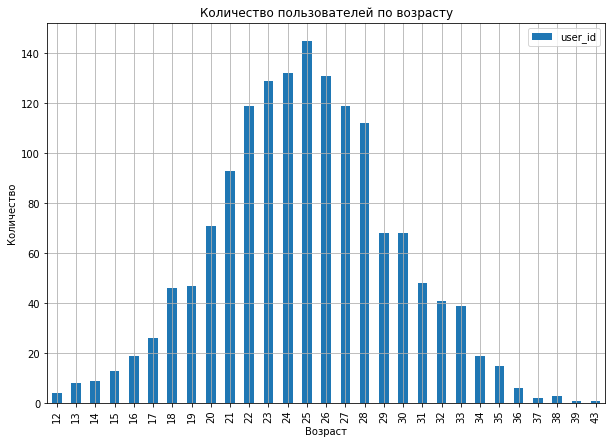

In [384]:
(
    users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(10, 7))
)
plt.title('Количество пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [385]:
print('Средний возраст пользователя:', users_go['age'].mean().round(1))
users_go['age'].describe()

Средний возраст пользователя: 24.9


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Вывод: сервисом аренды самокатов пользуются в основном люди 12-43лет. 
    Распределение возрастной кривой имеет нормальное распределение. 
    Средний возраст пользователя примерно 25 лет,этот же возраст является медианным.

3.4 Расстояние, которое пользователь преодолел за одну поездку.

In [387]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

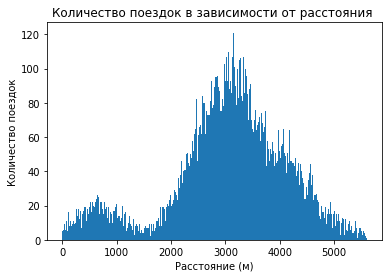

In [388]:
plt.hist(rides_go['distance'], bins=500, range=(1,5600))
plt.title('Количество поездок в зависимости от расстояния ')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

вывод:  пользователи за одну поездку преодолевают путь от 0.86м до 7211м.
        Медиана всех значений равна 3134 м. 
        Наблюдаются два пика: 1-й пик ок. 700м, 2-й большой пик ок 3200м. 
        Между пиками значения нормально распределены.

3.5 Продолжительность поездок

In [389]:
rides_go['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

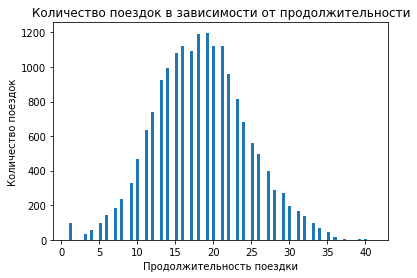

In [390]:
plt.hist(rides_go['duration'], bins=100, range=(1,41))
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

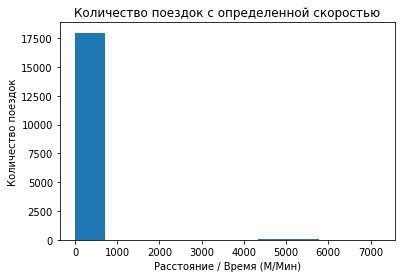

In [391]:
plt.hist(rides_go['distance'] / rides_go['duration'])
plt.title('Количество поездок с определенной скоростью')
plt.xlabel('Расстояние / Время (М/Мин)')
plt.ylabel('Количество поездок')
plt.show()

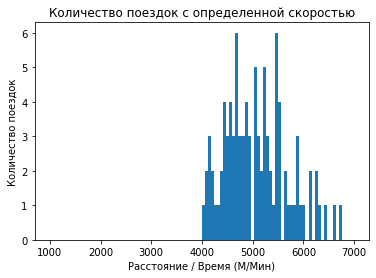

In [392]:
plt.hist(rides_go['distance'] / rides_go['duration'], bins=100, range=(1000,7000))
plt.title('Количество поездок с определенной скоростью')
plt.xlabel('Расстояние / Время (М/Мин)')
plt.ylabel('Количество поездок')
plt.show()

In [393]:
print('Максимальная скорость перемещения (м/мин)', (rides_go['distance'] / rides_go['duration']).max())

Максимальная скорость перемещения (м/мин) 7211.01


вывод: продолжительность поездок нормально распределена от 0 до 41 минуты. 
       Медиана поездок находится на 18 мин, первый квартиль- на 14 мин, третий квартиль -на 22 мин. 
       На гисторгамме замечено аномальное значение поездок порядка 100 со временем менее 1 мин,
       но они не являются выбрасами, т.к. подкреплены данными о поездках со столь же маленькими дистанциями.
       В некоторых случаях самокаты перемещались со средней скоростью  до 7211,01 м/мин, что практически невозможно.
       О данной аномалии необходимо сообщить владельцам бизнеса для устранения. 


Вывод по исследовательскму анализу

1.Услугами сервиса аренды самокатов пользуются больше всего в южных городах, где сезон проката больше, но на второй позиции оказался уральский город Екатеринбург.Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве.

2.Количество пользователей без подписки free 54,4% превышает количество пользователей с подпиской ultra 45,6%.

3.Количество пользователей в зависимости от возраста указывает, что средний возраст потребителя услуги подчиняется  нормальному распределению с медианой примерно в 25 лет, при этом средний возраст и медиана практически совпадают.
  Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет.

4.Пользователи за одну поездку преодолевают путь от 0.86м до 7211м. Медиана всех значений равна 3134 м. 
  Наблюдаются два пика: 1-й пик около 700м, 2-й большой пик около 3200м. 
  Между пиками значения нормально распределены.

5.Продолжительность поездок нормально распределена от 0 до 41 минуты. 
  Медиана поездок находится на 18 мин, первый квартиль- на 14 мин, третий квартиль -на 22 мин. 
  Замечено аномальное значение поездок порядка 100 со временем менее 1 мин,но они не являются выбрасами, 
  т.к. подкреплены данными о поездках со столь же маленькими дистанциями.
  В некоторых случаях самокаты перемещались со средней скоростью  до 7211,01 м/мин, что практически невозможно.
  О данной аномалии необходимо сообщить владельцам бизнеса для устранения. 








 Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

In [395]:
total_go = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')

In [396]:
total_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.69,27,2021-08-28,8,6,0,199


In [397]:
print("Количество строк (поездок) в 'rides_go':", rides_go['user_id'].count())
print("Количество строк (поездок) в 'total_go':", total_go['user_id'].count())
print()
print("Количество уникальных пользователей в 'users_go':", len(users_go['user_id'].unique()))
print("Количество уникальных пользователей в 'total_go':", len(total_go['user_id'].unique()))

Количество строк (поездок) в 'rides_go': 18068
Количество строк (поездок) в 'total_go': 18068

Количество уникальных пользователей в 'users_go': 1534
Количество уникальных пользователей в 'total_go': 1534


Количество строк (записей о поездках) в ‘rides_go’ и в ‘total_go’ одинаково и равно 18068; 
Количество уникальных пользователей в ‘users_go’ и в ‘total_go’ одинаково и равно 1534.

Исходные датафреймы не содержали пропусков и количество значений в них соответствует количеству в итоговом датафрейме total_go.

4.2.Создание двух датафреймов с пользователями,имеющими подписку и без нее,на основе общего датафрейма

4.2.1 Датафрейм данных о пользователяхс подпиской

In [398]:
ultra_go = total_go.loc[total_go['subscription_type'] == True]
ultra_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.69,27,2021-08-28,8,6,0,199


4.2.2 Датафрейм данных о пользователях без подписки

In [399]:
free_go = total_go.loc[total_go['subscription_type'] == False]
free_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,False,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,False,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,False,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,False,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,False,3047.38,18,2021-02-14,2,8,50,0


4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.


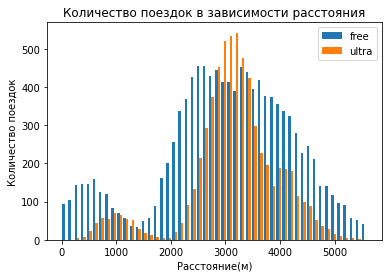

In [400]:
plt.hist([free_go['distance'], ultra_go['distance']], bins=50, range=(1,5600), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния')
plt.xlabel('Расстояние(м)')
plt.ylabel('Количество поездок')
plt.show()

In [401]:
free_go['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

In [402]:
ultra_go['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

Вывод: Дистанция поездок при использовании подписки ‘free’ более разнообразна. 
       максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при  
       использовании подписки ‘ultra’. Об этом же свидетельствует и стандартное отклонение, которое 
       при использовании подписки ‘free’ больше на 409 метров, чем при использовании подписки ‘ultra’. 
       Средняя дистанция при использовании подписки ‘free’ короче. 
       Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, чем 
       при использовании ‘ultra’.
       При использовании обеих подписок наблюдается два пика:первый небольшой пик на меньших дистанциях и 
       второй основной пик на больших дистанциях. 
       Меньший пик ‘ultra’ находится в районе 1000м, а основной примерно 3100м с небольшой коррекцией около 
       4000м.

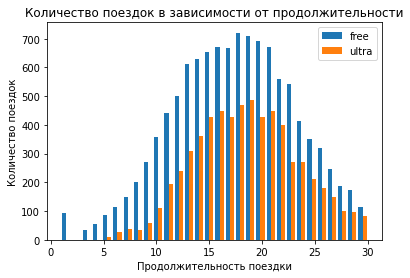

In [403]:
plt.hist([free_go['duration'], ultra_go['duration']], bins=30, range=(1,30), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

In [404]:
free_go['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [405]:
ultra_go['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Вывод: продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, 
       чем при использовании ‘ultra’. 
       Минимальное время меньше на 3 мин, а максимальное меньше на 6 мин.
       В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. 
       Пик количества поездок приходится на 17-18 минут. 
       При использовании подписки ‘free’ наблюдается пик в около 100 поездок с продолжительностью около 1 мин.


ВЫВОД: Подписка влияет на расстояние поездок и на время в пути.
       Пользователи с бесплатным тарифом 'free' в основном совершают поездки дольше, 
       и проезжают большее расстояние, чем пользователи на платном тарифе 'ultra'.



#### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными 
    из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя 
    за каждый месяц.


Создание сводной таблицы

In [406]:
total_go['duration'] = np.ceil(total_go['duration'])# Округление продолжительности поездок в 'duration'
                                                    
users_months_go = total_go.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=('count', 'sum'))

# Переименование "двухэтажных" названий столбцов
users_months_go.columns = [
    'count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]


Удаление дублирующих столбцов с подсчитанным количеством строк 

In [407]:
users_months_go = users_months_go.drop(['count2', 'count3', 'count4', 'count5'], axis=1)

Приведем столбцов с ценами к целевому состоянию

In [408]:
users_months_go['start_ride_price'] = users_months_go['start_ride_price'] / users_months_go['count']

users_months_go['minute_price'] = users_months_go['minute_price'] / users_months_go['count']

users_months_go['subscription_fee'] = users_months_go['subscription_fee'] / users_months_go['count']

users_months_go

count  distance  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2   7027.51      42.0           6.0               0.0   
        4          1    754.16       7.0           6.0               0.0   
        8          2   6723.47      46.0           6.0               0.0   
        10         2   5809.91      32.0           6.0               0.0   
        11         3   7003.50      56.0           6.0               0.0   
...              ...       ...       ...           ...               ...   
1534    6          2   3409.47      26.0           8.0              50.0   
        8          2   7622.45      48.0           8.0              50.0   
        9          1   4928.17      23.0           8.0              50.0   
        11         4  13350.02      78.0           8.0              50.0   
        12         1   2371.71      16.0           8.0              50.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0  
...                         ...  
1534    6                   0.0  
        8                   0.0  
        9                   0.0  
        11                  0.0  
        12                  0.0  

[11331 rows x 6 columns]

5.2 В этот же датафрейм добавим столбец с помесячной выручкой

Найдем суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц

Расчет и округление выручки

In [409]:
# Расчет и округление выручки
users_months_go['revenue'] = (
    (users_months_go['start_ride_price'] * users_months_go['count']) 
    + (users_months_go['minute_price'] * users_months_go['duration']) 
    + users_months_go['subscription_fee']
)
users_months_go['revenue'] = users_months_go['revenue'].astype('uint16')
# Удаление столбцов со вспомогательными данными
users_months_go = users_months_go.drop(['start_ride_price', 'minute_price'], axis=1)

users_months_go.head(10)

count  distance  duration  subscription_fee  revenue
user_id month                                                      
1       1          2   7027.51      42.0             199.0      451
        4          1    754.16       7.0             199.0      241
        8          2   6723.47      46.0             199.0      475
        10         2   5809.91      32.0             199.0      391
        11         3   7003.50      56.0             199.0      535
        12         2   6751.63      28.0             199.0      367
2       3          3  10187.73      63.0             199.0      577
        4          2   6164.39      40.0             199.0      439
        6          1   3255.34      14.0             199.0      283
        7          2   6780.73      48.0             199.0      487

#### Шаг 6. Проверка гипотез

6.1 Определим, тратят ли пользователи с подпиской больше времени на поездки,чем без нее?

Нулевая и альтернативная гипотезы:
    
Гипотеза Н0: Средняя продолжительность поездок с подпиской ‘ultra’ и ‘free’ равны.

Гипотеза Н1: Средняя продолжительность поездок с подпиской ‘ultra’ больше, чем с подпиской ‘free’.

alpha = 0.05

In [2]:
results = st.ttest_ind(ultra_go['duration'], free_go['duration'], equal_var=True, alternative='greater')
print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

NameError: name 'st' is not defined

вывод: нулевая гипотеза отвергнута,  средняя продолжительность поездки с подпиской больше продолжительности 
      поездок без подписки при установленном уровне значимости в 5 %, 
      хотя на гистограммах, это практически не прослеживается.



6.2 Оптимальное растояние поездки с точки зрения износа самоката для пользователей с подпиской

Расстояние одной поездки в 3130м — оптимальное с точки зрения износа самоката.

Установим действительно ли, что расстояние, которое проезжают пользователи с подпиской за одну поездку, 
не превышает 3130м?

Гипотезы:

Н0: Среднее расстояние поездок с подпиской ultra равно оптимальному расстоянию  3130м.
    
    
Н1: Среднее расстояние поездок с подпиской ultra больше оптимального  3130м.
    

alpha = 0.05

In [3]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    ultra_go['distance'], 
    distance,
    alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


NameError: name 'st' is not defined

вывод: нулевую гипотезу не получилось отвергнуть,поэтому среднее расстояние поездки пользователей с подпиской ultra
       не превышает оптимальное расстоянием в 3130м,с точки зрения износа самоката, 
       при установленном уровне значимости в 5 %.



6.3. Определим, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, 
     чем выручка от пользователей без подписки

Гипотезы:

Н0: Помесячная средняя выручка от пользователей с подпиской равна помесячной средней выручке 
    от пользователей без подписки.

Н1: Помесячная средняя выручка от пользователей с подпиской больше помесячной средней выручки 
    от пользователей без подписки.

alpha = 0.05

In [412]:
esults = st.ttest_ind(
    users_months_go.loc[users_months_go['subscription_fee'] > 0, 'revenue'], 
    users_months_go.loc[users_months_go['subscription_fee'] == 0, 'revenue'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


вывод: не получилось отвергнуть нулевую гипотезу о том, что помесячная средняя выручка от поездок с использованием 
       подписки ‘ultra’  равна помесячной средней выручке с ипользованием подписки ‘free’.
       как минимум, помесячная выручка от подписки ‘ultra’ не меньше, чем от подписки‘free’, и  её следует развивать.

6.4. Разберем ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует 
     мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
     Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
     Какой тест вам понадобился бы для проверки этой гипотезы?
 
Теоретически это две зависимые выборки, иначе - парные. 
Если в данных некоторая переменная измеряется дважды (количество обращений в техподдержку до обновления серверов и после ) для одних и тех же пользователей и имеют одинаковые размеры, тогда можно применить метод scipy.stats.ttest_rel(), при проверке на то что, истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности после изменения, следует указать alternative="less".
Если требования к зависимым выборкам не выполняются, можно воспользоваться методом scipy.stats.ttest_ind().



Шаг 7. Распределения

7.1 сколько промокодов нужно разослать на один бесплатный месяц, чтобы в следующем месяце как минимум 100 
    существующих клиентов продлили подписку.
    
    Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода 
    подписку   продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать,
    чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту 
    ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.
 

При рассылке  1161 промокодов  вероятность не выполнить план меньше 5.0 %


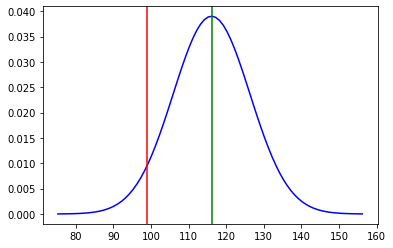

In [413]:
n = 1000
p = 0.1
k = 99
binom_cdf = 0.05

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При рассылке  {n} промокодов  вероятность не выполнить план меньше {binom.cdf(k, n, p).round(2)*100} %')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()


вывод: нужно разослать подписчикам  минимум 1161 промокодов,  чтобы как минимум 100 существующих клиентов 
       продлили подписку (продлевают подписку 10% пролучивших промокод) с вероятностью не выполнить план 5%.



7.2.Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. 
Клиенты могут открыть его или не открывать. 
Известно, что уведомления открывают около 40 % получивших клиентов. 
Отдел планирует разослать 1млн уведомлений. 
С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, 
что уведомление откроют не более 399,5 тыс. пользователей.

параметры биномиального распределения

In [414]:
n = 1000000 #кол-во уведомлений
p = 0.4     #40% открывают уведомления
k = 399500  # не более 399.5тыс. пользователей откроют


зададим мат.ожидание и ст.отклонение нормального распределения равными
мат.ожиданию и ст.отклонению биномиального распределения


In [415]:
mu = n * p
sigma = (n * p * (1 - p))**0.5


distr = st.norm(mu, sigma) # нормальное распределение


result = distr.cdf(k) #вероятность хвоста слева от 399.5 тысяч

print('Вероятность открытия сообщений:', result)

Вероятность открытия сообщений: 0.15371708296369768


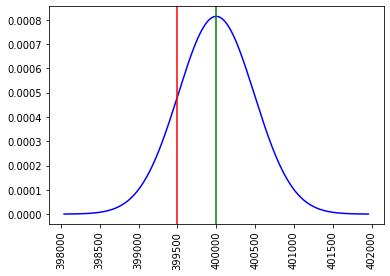

In [416]:
arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.xticks(rotation=90)
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.show()

Вывод: если разослать 1 млн уведомлений (откроют только 40 % получивших клиентов), 
тогда вероятность того, что уведомление откроют не более 399,5 тыс. пользователей  15,37 %.

# Общий вывод

В процессе исследования данных о пользователях популярного сервиса аренды самокатов 'GoFast',
были выполнены следующие этапы и сделаны выводы:
    
1.  Загрузка данных

  В предоставленных данных файла о пользователях users_go имеются 1565 записей; пропусков нет, количество явных дубликатов: 31; 
  
  в предоставленных данных файла о поездках rides_go имеются 18068 записей, пропусков нет, явных дубликатов нет; 
  
  в предоставленных жанных файла о подписке subscriptions_go имеются 2 записи, пропусков нет, явных дубликатов нет.   
  Названия столбцов в норме. 
  
  Данные признаны полными и достаточными для исследования.
  
  
2.  Предобработка данных


     В результате предобработки данных было выполнены следующие действия: 
     в данных users_go удалил дубликаты; 
     в данных users_go округлил distance в метрах до 2 знаков после запятой, округлил duration до целых и 
     перевел в int, привел столбец date к типу datetime64, создали столбец month с номером месяца; 
     корректировка столбца 'subscription_type'.
  
  
3. Исследовательский анализ данных
    
    
     Услугами сервиса аренды самокатов пользуются больше всего в южных городах, где сезон проката больше, но на второй позиции оказался уральский город Екатеринбург.Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве.

     Количество пользователей без подписки free 54,4% превышает количество пользователей с подпиской ultra 45,6%.

     Количество пользователей в зависимости от возраста указывает, что средний возраст потребителя услуги подчиняется нормальному распределению с медианой примерно в 25 лет, при этом средний возраст и медиана практически совпадают. Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет.

     Пользователи за одну поездку преодолевают путь от 0.86м до 7211м. Медиана всех значений равна 3134 м. Наблюдаются два пика: 1-й пик около 700м, 2-й большой пик около 3200м. Между пиками значения нормально распределены.

     Продолжительность поездок нормально распределена от 0 до 41 минуты. Медиана поездок находится на 18 мин, первый квартиль- на 14 мин, третий квартиль -на 22 мин. Замечено аномальное значение поездок порядка 100 со временем менее 1 мин,но они не являются выбрасами, т.к. подкреплены данными о поездках со столь же маленькими дистанциями. В некоторых случаях самокаты перемещались со средней скоростью до 7211,01 м/мин, что практически невозможно. О данной аномалии необходимо сообщить владельцам бизнеса для устранения.


4.  Объединение данных

    Дистанция поездок при использовании подписки ‘free’ более разнообразна. максимальная дистанция больше 
    на 1511   метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’. 
    Об этом же свидетельствует и стандартное отклонение, которое при использовании подписки ‘free’ больше 
    на 409 метров, чем при использовании подписки ‘ultra’. Средняя дистанция при использовании подписки 
    ‘free’ короче. Это следует из того, что среднее значениее на 70 метров, а медиана на 34 метра, меньше, 
    чем при использовании ‘ultra’.
    При использовании обеих подписок наблюдается два пика:первый небольшой пик на меньших дистанциях 
    и второй основной пик на больших дистанциях. Меньший пик ‘ultra’ находится в районе 1000м, а основной 
    примерно 3100м с небольшой коррекцией около 4000м.
    
     Продолжительность поездок при использовании подписки ‘free’ немного меньше по всем показателям, 
     чем при использовании ‘ultra’. Минимальное время меньше на 3 мин, а максимальное меньше на 6 мин. 
     В обоих случаях количество поездок относительно нормально распределено в зависимости от их 
     продолжительности. Пик количества поездок приходится на 17-18 минут. 
     При использовании подписки ‘free’ наблюдается пик в около 100 поездок с продолжительностью около 1 мин.

     Cделал вывод,что подписка влияет на расстояние поездок и на время в пути. 
     Пользователи с бесплатным тарифом 'free' в основном совершают поездки дольше, и проезжают большее 
     расстояние, чем пользователи на платном тарифе 'ultra'.
     
     
5. Подсчет выручки
    
    Создал датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: 
    нашел суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    В этот же датафрейм добавил столбец с помесячной выручкой.
    
    
6. Проверка гипотез
    
    Определил, тратят ли пользователи с подпиской больше времени на поездки,чем без нее?
    Нулевая гипотеза была отвергнута, средняя продолжительность поездки с подпиской больше продолжительности 
    поездок без подписки при установленном уровне значимости в 5 %, хотя на гистограммах, это практически 
    не прослеживается.
    
    Установил, действительно ли  расстояние, которое проезжают пользователи с подпиской за одну поездку, 
    не превышает 3130м?
    Нулевую гипотезу не получилось отвергнуть,поэтому среднее расстояние поездки пользователей с подпиской 
    ultra не превышает оптимальное расстоянием в 3130м,с точки зрения износа самоката, при установленном 
    уровне значимости в 5 %.
    
    Определимл, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка 
    от пользователей без подписки?
    
    Не получилось отвергнуть нулевую гипотезу о том, что помесячная средняя выручка от поездок 
    пользователя с  использованием подписки ‘ultra’  равна помесячной средней выручке с ипользованием 
    подписки ‘free’.Как минимум, выручка от подписки ‘ultra’ не меньше, чем от подписки‘free’, 
    и  её следует развивать.


7. Распределения

    Необходимо разослать подписчикам как минимум 1161 промокодов,  чтобы как минимум 100 существующих 
    клиентов продлили подписку (продлевают подписку 10% пролучивших промокод) с вероятностью  не выполнить план 5%.
    Если разослать 1 млн уведомлений (откроют только 40 % получивших клиентов), тогда вероятность того, 
    что уведомление откроют не более 399,5 тыс. пользователей составит  15,37 %.
    
    











